# Analysing Public Member Info on Meetup.com

In this notebook we do some simple analysis of information about members registered on [meetup.com](https://meetup.com). We extract the info using the official [meetup API](https://www.meetup.com/meetup_api/)  where you can also get [your API key](https://secure.meetup.com/meetup_api/key/) as a registered member.

**N.B.** This is work in progress.

## Getting Started

In [1]:
%matplotlib inline

import re
import os
import json

import requests
import pandas as pd

In [2]:
server = 'https://api.meetup.com'
group_urlname = 'Python-Users-Berlin-PUB'
from meetup_api_key import key

Get information about a group on Meetup.com:

In [3]:
requests.get("https://api.meetup.com/%s?key=%s" % (group_urlname, key)).json()

{'category': {'id': 34,
  'name': 'Tech',
  'shortname': 'Tech',
  'sort_name': 'Tech'},
 'city': 'Berlin',
 'country': 'DE',
 'created': 1352071340000,
 'description': '<p>This is the Python Users Group Berlin (PUB). We host presentations and discussions about Python and Python-related software development (mostly framework-independent).</p>\n<p><span>Currently most talks are held in English language but we usually switch to German if all visitors speak German. Please indicate your interest on the mailing list (</span><a href="http://starship.python.net/cgi-bin/mailman/listinfo/python-berlin" class="linkified">http://starship.python.net/cgi-bin/mailman/...</a><span>) if you are interested in any specific language so the speakers can prepare for that. We meet every 2nd Thursday of the month at 7pm at <a href="http://co-up.de">co.up</a>&nbsp;(close to Kottbusser Tor or "Kotti" ;-).</span>&nbsp;<span>Since attendance rate in Berlin is usually under 50% only we\'ve stopped limiting the nu

Get information about two members of that group:

In [4]:
url = server + "/2/members?offset=1&page=2&order=name&group_urlname=%s&key=%s" % (group_urlname, key)
info = requests.get(url).json()
# hide key so it doesn't show up in some repository:
for f in ('next', 'url'):
    info['meta'][f] = re.sub('key=\w+', 'key=******', info['meta'][f])

In [5]:
info

{'meta': {'count': 2,
  'description': 'API method for accessing members of Meetup Groups',
  'id': '',
  'lat': '',
  'link': 'https://api.meetup.com/2/members',
  'lon': '',
  'method': 'Members',
  'next': 'https://api.meetup.com/2/members?offset=2&format=json&group_urlname=Python-Users-Berlin-PUB&page=2&key=******&order=name',
  'title': 'Meetup Members v2',
  'total_count': 2394,
  'updated': 1486231644000,
  'url': 'https://api.meetup.com/2/members?offset=1&format=json&group_urlname=Python-Users-Berlin-PUB&page=2&key=******&order=name'},
 'results': [{'city': 'Berlin',
   'country': 'de',
   'id': 214130302,
   'joined': 1475364688000,
   'lat': 52.52,
   'link': 'http://www.meetup.com/members/214130302',
   'lon': 13.38,
   'name': '/f',
   'other_services': {},
   'photo': {'base_url': 'http://photos1.meetupstatic.com',
    'highres_link': 'http://photos1.meetupstatic.com/photos/member/2/2/3/4/highres_260648756.jpeg',
    'photo_id': 260648756,
    'photo_link': 'http://photos3

In [6]:
def get_all_members(group_urlname, verbose=False):
    "Read members info from a sequence of pages."

    total = []
    offset = 1
    page = 200
    url = "{server}/2/members?offset={offset}&format=json&group_urlname={group_urlname}&page={page}&key={key}&order=name"
    url = url.format(server=server, offset=offset, page=page, group_urlname=group_urlname, key=key)
    info = requests.get(url).json()
    total += info['results']
    if verbose:
        print(url)
        print(len(total), info['meta']['count'])
    while True:
        next_url = info['meta']['next']
        print(next_url)
        if not next_url:
            break
        js = requests.get(next_url).json()
        total += info['results']
        print(len(total), info['meta']['count'])
    if verbose:
        print('found %d members' % len(total))
    return total

In [7]:
path = 'pub-members.json'
if os.path.exists(path):
    members = json.load(open(path))
else:
    members = get_all_members('Python-Users-Berlin-PUB')
    json.dump(members, open(path, 'w'))

In [8]:
members[0]

{'bio': 'loves numbers, data, and code',
 'city': 'Berlin',
 'country': 'de',
 'hometown': 'Kolkata, IN',
 'id': 193168948,
 'joined': 1452637632000,
 'lat': 52.52,
 'link': 'http://www.meetup.com/members/193168948',
 'lon': 13.38,
 'name': 'Arnab Dutta',
 'other_services': {},
 'photo': {'base_url': 'http://photos1.meetupstatic.com',
  'highres_link': 'http://photos1.meetupstatic.com/photos/member/d/e/6/d/highres_250016941.jpeg',
  'photo_id': 250016941,
  'photo_link': 'http://photos3.meetupstatic.com/photos/member/d/e/6/d/member_250016941.jpeg',
  'thumb_link': 'http://photos1.meetupstatic.com/photos/member/d/e/6/d/thumb_250016941.jpeg',
  'type': 'member'},
 'self': {'common': {}},
 'status': 'active',
 'topics': [{'id': 563, 'name': 'Open Source', 'urlkey': 'opensource'},
  {'id': 3833, 'name': 'Software Development', 'urlkey': 'softwaredev'},
  {'id': 9696, 'name': 'New Technology', 'urlkey': 'newtech'},
  {'id': 10209, 'name': 'Web Technology', 'urlkey': 'web'},
  {'id': 18062, 

## PUB Members' Interests

In [9]:
members[0]['topics']

[{'id': 563, 'name': 'Open Source', 'urlkey': 'opensource'},
 {'id': 3833, 'name': 'Software Development', 'urlkey': 'softwaredev'},
 {'id': 9696, 'name': 'New Technology', 'urlkey': 'newtech'},
 {'id': 10209, 'name': 'Web Technology', 'urlkey': 'web'},
 {'id': 18062, 'name': 'Big Data', 'urlkey': 'big-data'},
 {'id': 38660, 'name': 'Lean Startup', 'urlkey': 'lean-startup'},
 {'id': 15167, 'name': 'Cloud Computing', 'urlkey': 'cloud-computing'},
 {'id': 29971, 'name': 'Machine Learning', 'urlkey': 'machine-learning'},
 {'id': 30928, 'name': 'Data Analytics', 'urlkey': 'data-analytics'},
 {'id': 37381, 'name': 'Data Visualization', 'urlkey': 'data-visualization'},
 {'id': 98137,
  'name': 'Machine Intelligence',
  'urlkey': 'machine-intelligence'},
 {'id': 153481,
  'name': 'Support Vector Machines',
  'urlkey': 'support-vector-machines'},
 {'id': 1481522,
  'name': 'Data Science using Python',
  'urlkey': 'data-science-using-python'},
 {'id': 1502, 'name': 'Art', 'urlkey': 'art'},
 {'i

In [10]:
pd.DataFrame(members[0]['topics'])

,id,name,urlkey
0,563,Open Source,opensource
1,3833,Software Development,softwaredev
2,9696,New Technology,newtech
3,10209,Web Technology,web
4,18062,Big Data,big-data
5,38660,Lean Startup,lean-startup
6,15167,Cloud Computing,cloud-computing
7,29971,Machine Learning,machine-learning
8,30928,Data Analytics,data-analytics
9,37381,Data Visualization,data-visualization


Now build a dataframe with this information for all members:

In [11]:
df = pd.concat([pd.DataFrame(m['topics']) for m in members])

In [12]:
len(df)

36130

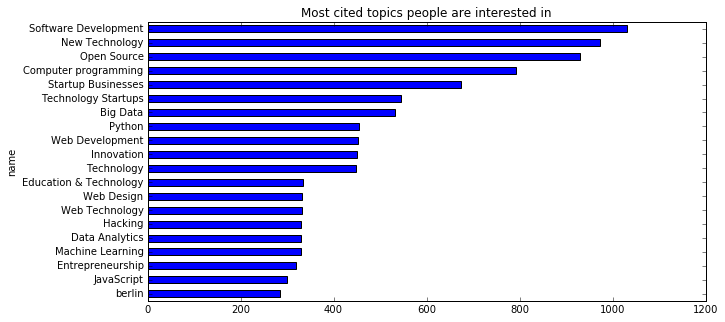

In [13]:
s = df.groupby('name').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Most cited topics people are interested in', figsize=(10, 5))

## PyData Members' Interests

In [14]:
path = 'pydata-members.json'
if os.path.exists(path):
    members = json.load(open(path))
else:
    members = get_all_members('PyData-Berlin')
    json.dump(members, open(path, 'w'))

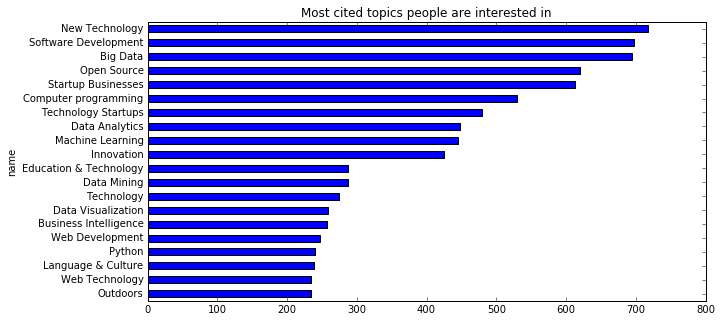

In [15]:
df = pd.concat([pd.DataFrame(m['topics']) for m in members])
s = df.groupby('name').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Most cited topics people are interested in', figsize=(10, 5))

## Members' Groups?

Information about the groups a member has joined seems to be harder to find... (???)